<a href="https://colab.research.google.com/github/FlavioGermanoPinheiro/unsupervised-learning/blob/main/AMNS_unidade_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!pip install -q sentence-transformers umap-learn hdbscan scikit-learn plotly pandas matplotlib seaborn

In [77]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

SEED = 42
np.random.seed(SEED)
random.seed(SEED)


In [78]:
sentences = [
 'I swap butter for olive oil in many recipes.',
 'Canberra is the capital of Australia.',
 'Ottawa is the capital city of Canada.',
 'Paris is the most populated city in France.',
 'Tokyo is among the most populous metropolitan areas worldwide.',
 'I prefer my coffee with no sugar and a splash of milk.',
 'The recipe for pasta carbonara is simple.',
 'A pinch of salt enhances sweetness in desserts.',
 'Alignment techniques reduce harmful outputs.',
 'Explainable AI highlights salient features for decisions.',
 'Transformer models enable long-range language dependencies.',
 'Black swan events stress-test portfolio resilience.',
 'The Sahara Desert spans much of North Africa.',
 'Inflation erodes real purchasing power of cash.',
 'Aromatics like garlic and onion build flavor early.',
 'Value stocks trade at lower multiples relative to fundamentals.',
 'Quantization reduces memory with minimal accuracy loss.',
 'Tax-loss harvesting offsets capital gains.',
 'Investing in technology can be risky.',
 'Fermented foods add acidity and complexity.',
 'Marinating tofu improves texture and taste.',
 'Vector databases power semantic search at scale.',
 'Distillation transfers knowledge from large to small models.',
 'The Great Barrier Reef lies off Australia’s northeast coast.',
 'Retrieval-augmented generation grounds answers in sources.',
 'Iceland lies on the Mid-Atlantic Ridge.',
 'The Baltic states border the eastern Baltic Sea.',
 'Multimodal learning aligns text with images and audio.',
 'Risk tolerance should guide position sizing.',
 'Time in the market beats timing the market.',
 'Behavioral biases can derail investment plans.',
 'Reinforcement learning fine-tunes policies from human feedback.',
 'Edge AI runs models under strict latency constraints.',
 'Deglazing lifts browned bits to make pan sauces.',
 'Tempering chocolate stabilizes cocoa butter crystals.',
 'What is the capital of France?',
 'Johannesburg is a major city but not South Africa’s capital.',
 'The Danube passes through multiple European capitals.',
 'The Amazon River carries one of the largest water volumes on Earth.',
 'A healthy emergency fund reduces forced selling.',
 'I batch-cook grains for quick lunches.',
 'Resting steak helps redistribute the juices.',
 'The Atacama is one of the driest deserts on the planet.',
 'Liquidity risk rises when trading volumes are thin.',
 'Mount Everest is the highest peak above sea level.',
 'Graph neural networks capture relational structure.',
 'Sourdough starter needs regular feedings to stay active.',
 'The stock market experienced a drop today.',
 'Umami-rich ingredients deepen savory dishes.',
 'Al dente pasta retains a slight bite after cooking.',
 'Rebalancing restores target asset allocation.',
 'Continual learning mitigates catastrophic forgetting.',
 'Bond duration measures sensitivity to interest-rate changes.',
 'Diffusion models synthesize high-fidelity images.',
 'Expense ratios compound against long-term returns.',
 'Self-supervised pretraining reduces labeled data needs.',
 'What country contains the city of Kyoto?',
 'Stir-frying requires high heat and constant movement.',
 'Covered calls generate income with capped upside.',
 'The Nile flows northward into the Mediterranean Sea.',
 'Causal inference distinguishes correlation from effect.',
 'Prompt engineering steers generative behavior reliably.',
 'Few-shot prompting improves generalization on new tasks.',
 'Growth investing prioritizes earnings expansion.',
 'The Alps stretch across several central European countries.',
 'The Andes form a continuous mountain range along South America.',
 'I cook vegetarian meals on weekdays to simplify planning.',
 'Natural language processing has advanced greatly.',
 'Sous-vide delivers precise temperature control.',
 'Diversification reduces idiosyncratic risk across holdings.',
 'Sharpe ratio evaluates risk-adjusted performance.',
 'Artificial intelligence is transforming the world.',
 'Credit spreads widen during economic uncertainty.',
 'Emerging markets add diversification but higher volatility.',
 'Mise en place speeds up weeknight cooking.',
 'The Caspian Sea is a landlocked body of water.',
 'Evaluation with benchmarks must avoid data leakage.',
 'Cairo sits along the Nile River delta.',
 'Federated learning trains models without centralizing data.',
 'Lagos is Nigeria’s largest city by population.',
 'Dollar-cost averaging smooths entry price over time.',
 'LoRA adapters enable efficient fine-tuning.',
 'I keep a jar of homemade pesto for pasta.',
 'New Delhi serves as the seat of India’s government.',
 'I like to cook Italian dishes on Sundays.',
 'Roasting vegetables caramelizes natural sugars.',
 'ETFs provide broad market exposure with intraday liquidity.',
 'Proofing time affects a bread’s crumb structure.'
]
N = len(sentences)
print(f"N = {N} sentenças")


N = 88 sentenças


In [79]:
# Carregar modelo BERT.
model_name = "bert-base-nli-mean-tokens"  # BERT-based sentence-transformer.
model = SentenceTransformer(model_name)

# Gera embeddings.
X = model.encode(sentences, batch_size=32, show_progress_bar=True)
X = np.array(X)  # forma (N, dim)
print("Shape dos embeddings:", X.shape)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Shape dos embeddings: (88, 768)


In [80]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [81]:
pca = PCA(n_components=0.95, random_state=SEED)  # mantém 95% da variância.
X_pca = pca.fit_transform(X_scaled)
print("Dimensionalidade após PCA (95% var):", X_pca.shape)
# Reduza a dimensionalidade dos embeddings para 2 componentes principais.
pca2 = PCA(n_components=2, random_state=SEED)
X_pca2 = pca2.fit_transform(X_scaled)


Dimensionalidade após PCA (95% var): (88, 55)


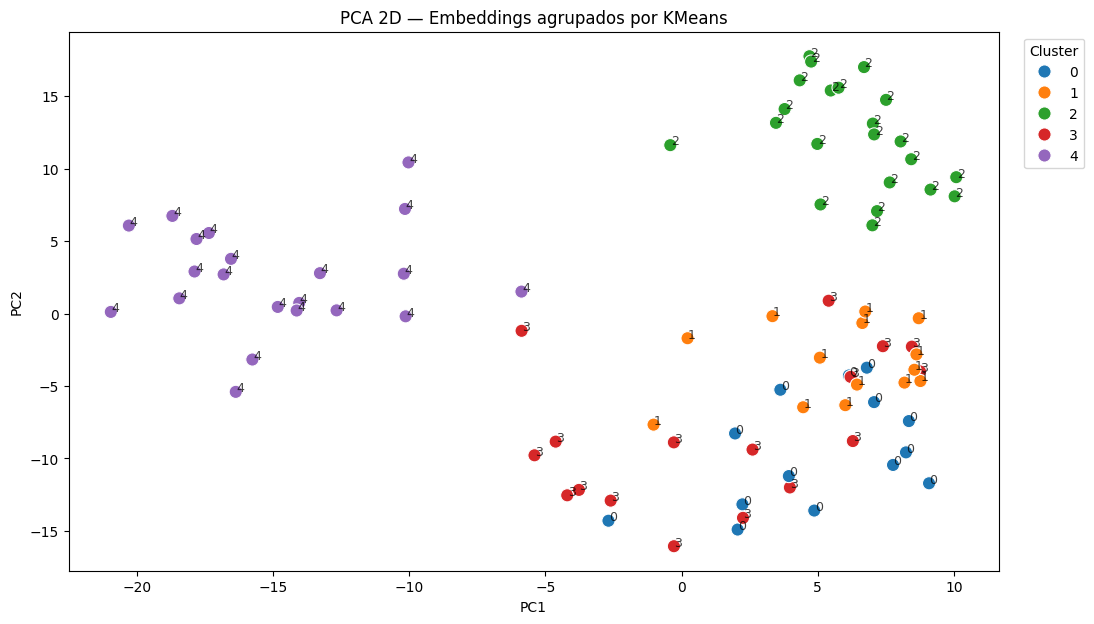


 Clusters encontrados:

Cluster 0:
 • Explainable AI highlights salient features for decisions.
 • Black swan events stress-test portfolio resilience.
 • Investing in technology can be risky.

Cluster 1:
 • Inflation erodes real purchasing power of cash.
 • Value stocks trade at lower multiples relative to fundamentals.
 • Tax-loss harvesting offsets capital gains.

Cluster 2:
 • Canberra is the capital of Australia.
 • Ottawa is the capital city of Canada.
 • Paris is the most populated city in France.

Cluster 3:
 • Alignment techniques reduce harmful outputs.
 • Transformer models enable long-range language dependencies.
 • Quantization reduces memory with minimal accuracy loss.

Cluster 4:
 • I swap butter for olive oil in many recipes.
 • I prefer my coffee with no sugar and a splash of milk.
 • The recipe for pasta carbonara is simple.


In [82]:
# Plote os pontos resultantes com matplotlib, identificando possíveis agrupamentos. Analise qualitativamente se há separação entre textos de temas distintos.
# Clusterização com KMeans para deixar o gráfico com um visual melhor (cores e rótulos).
K = 5
kmeans = KMeans(n_clusters=K, random_state=SEED)
labels = kmeans.fit_predict(X_scaled)

# Gráfico do PCA com cores e rótulos.
plt.figure(figsize=(12,7))
scatter = sns.scatterplot(
    x=X_pca2[:,0], y=X_pca2[:,1],
    hue=labels, palette="tab10", s=90
)

# Adiciona texto sobre cada ponto.
for i in range(len(X_pca2)):
    plt.text(X_pca2[i,0] + 0.02, X_pca2[i,1] + 0.02, str(labels[i]),
             fontsize=9, alpha=0.75)

plt.title("PCA 2D — Embeddings agrupados por KMeans")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02,1))
plt.show()

print("\n Clusters encontrados:")
for c in range(K):
   exemplos = [sentences[i] for i in range(len(labels)) if labels[i] == c][:3]  # 3 exemplos por cluster.
   print(f"\nCluster {c}:")
   for ex in exemplos:
      print(" •", ex[:80])




É possível observar a formação de clusters (0, 1, 2, 3 e 4) por temas semânticos distintos.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 88 samples in 0.004s...
[t-SNE] Computed neighbors for 88 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 88 / 88
[t-SNE] Mean sigma: 13.197264
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.622536
[t-SNE] KL divergence after 950 iterations: 0.421231
Shape após t-SNE: (88, 2)


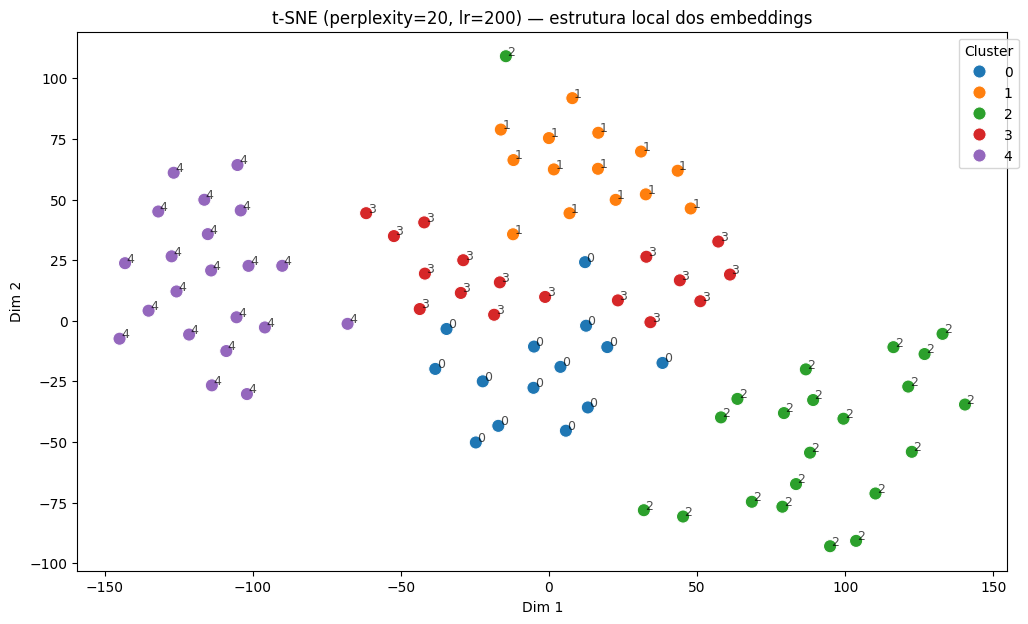

In [83]:
# t-SNE (t-distributed Stochastic Neighbor Embedding).

from sklearn.manifold import TSNE

# Testar o ajuste de diferentes parâmetros de perplexity e learning_rate para comparar resultados.
perplexity = 20
learning_rate = 200
n_iter = 1000
random_state = SEED

# Aplica t-SNE sobre os embeddings escalonados.
tsne = TSNE(
    n_components=2,
    perplexity=perplexity,
    learning_rate=learning_rate,
    n_iter=n_iter,
    random_state=random_state,
    init='pca',
    verbose=1
)

X_tsne = tsne.fit_transform(X_scaled)
print("Shape após t-SNE:", X_tsne.shape)

# Visualização dos resultados.
plt.figure(figsize=(12,7))
scatter = sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=labels, palette="tab10", s=90
)

# Rótulos de cluster.
for i in range(len(X_tsne)):
    plt.text(X_tsne[i,0] + 0.5, X_tsne[i,1] + 0.5, str(labels[i]),
             fontsize=9, alpha=0.7)

plt.title(f"t-SNE (perplexity={perplexity}, lr={learning_rate}) — estrutura local dos embeddings")
plt.xlabel("Dim 1"); plt.ylabel("Dim 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1))
plt.show()


Os clusters ficaram melhores ajustados entre 20 e 30 do parâmetro perplexity e com relação a taxa de aprendizado (learning_rate), obteve um melhor ajuste no valor de 200. Pode-se observar também os agrupamentos de clusters, ou seja,que apresentou boa coerência semântica dos embeddings.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Shape após UMAP: (88, 2)


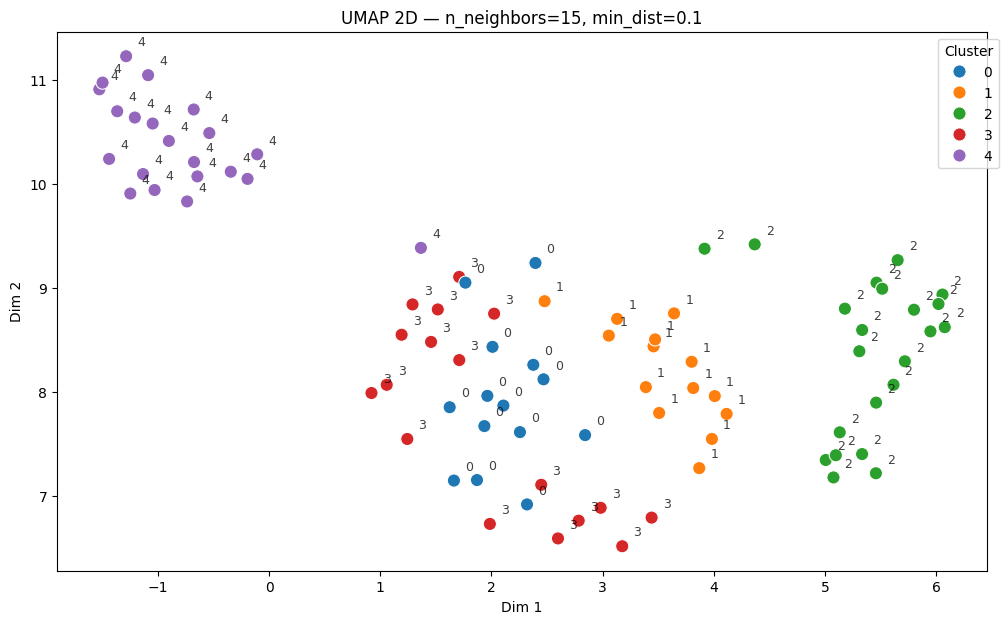

In [84]:
# UMAP (Uniform Manifold Approximation and Projection).

import umap.umap_ as umap

# Experimente variar n_neighbors e min_dist para observar mudanças na distribuição dos clusters.
n_neighbors = 15
min_dist = 0.1
n_components = 2
metric = 'euclidean'

# Ajuste do modelo UMAP.
umap_model = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric=metric,
    random_state=SEED
)

X_umap = umap_model.fit_transform(X_scaled)
print("Shape após UMAP:", X_umap.shape)

# Visualização dos clusters.
plt.figure(figsize=(12,7))
scatter = sns.scatterplot(
    x=X_umap[:,0], y=X_umap[:,1],
    hue=labels, palette="tab10", s=90
)

# Adiciona rótulos de cluster sobre os pontos.
for i in range(len(X_umap)):
    plt.text(X_umap[i,0] + 0.1, X_umap[i,1] + 0.1, str(labels[i]),
             fontsize=9, alpha=0.75)

plt.title(f"UMAP 2D — n_neighbors={n_neighbors}, min_dist={min_dist}")
plt.xlabel("Dim 1"); plt.ylabel("Dim 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02,1))
plt.show()


É possível observar que quanto menor o valor do número de vizinhos (n_neighbors) mais coesos ficam os clusters. O valor padrão de 15 fornece uma boa visualização dos clusters. Com relação a (min_dist) distância mínima, o valor de até 0.1 proporciona clusters mais compactos e acima disso clusters mais espalhados, separando mais os grupos.

A comparação visual com os resultados do PCA e t-SNE, mostram que o melhor agrupamento (mais equlibrado) ficou com o UMAP sendo o pior resultado para o PCA o qual apresentou clusters mais espaçados que os demais.

In [85]:
# Classificação.

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cluster_nomes = {
    0: "Finanças",
    1: "Economia",
    2: "Geografia",
    3: "Inteligência Artificial e Machine Learning",
    4: "Culinária"
}

# Calcula os centróides dos clusters existentes.
cluster_centroids = []
for c in range(K):
    centroid = X_scaled[labels == c].mean(axis=0)
    cluster_centroids.append(centroid)
cluster_centroids = np.vstack(cluster_centroids)

# Função para gerar o embedding do texto.
def classificar_texto(texto: str):

    emb = model.encode([texto])
    emb_scaled = scaler.transform(emb)

# Calcula a similaridade entre embedding e centróide.
    sims = cosine_similarity(emb_scaled, cluster_centroids)[0]
    cluster_pred = np.argmax(sims)

    nome_cluster = cluster_nomes.get(cluster_pred, f"Cluster {cluster_pred}")
    print(f"\nTexto: {texto}")
    print(f"→ Cluster mais próximo: {cluster_pred} ({nome_cluster})")
    print(f"Similaridades: {np.round(sims, 3)}")
    return cluster_pred, nome_cluster


In [86]:
# Testes de exemplo.
testes = [
 "Bond duration measures sensitivity to interest-rate changes.",
 "Diffusion models synthesize high-fidelity images.",
 "Expense ratios compound against long-term returns.",
 "Self-supervised pretraining reduces labeled data needs.",
 "What country contains the city of Kyoto?",
 "Stir-frying requires high heat and constant movement."
]

for texto in testes:
    classificar_texto(texto)



Texto: Bond duration measures sensitivity to interest-rate changes.
→ Cluster mais próximo: 1 (Economia)
Similaridades: [ 0.143  0.567 -0.067 -0.123 -0.296]

Texto: Diffusion models synthesize high-fidelity images.
→ Cluster mais próximo: 3 (Inteligência Artificial e Machine Learning)
Similaridades: [ 0.029  0.018 -0.103  0.533 -0.268]

Texto: Expense ratios compound against long-term returns.
→ Cluster mais próximo: 1 (Economia)
Similaridades: [ 0.084  0.655 -0.134 -0.01  -0.324]

Texto: Self-supervised pretraining reduces labeled data needs.
→ Cluster mais próximo: 0 (Finanças)
Similaridades: [ 0.41  -0.02  -0.4    0.394 -0.087]

Texto: What country contains the city of Kyoto?
→ Cluster mais próximo: 2 (Geografia)
Similaridades: [ 0.016 -0.063  0.366 -0.215 -0.192]

Texto: Stir-frying requires high heat and constant movement.
→ Cluster mais próximo: 4 (Culinária)
Similaridades: [-0.286 -0.258 -0.057 -0.071  0.433]


Pode-se observar que com relação a parte "Similaridades:" os valores quanto mais próximos de 1.0 (idêntico) mais correlaciona o texto a determinado cluster (mostra o grau de similaridade coseno entre o texto e cada centróide de cluster).